# 1.概述

1.Matplotlib三层API   
`matplotlib.backend_bases.FigureCanvas` 绘图区，所有的图像都是在绘图区完成的  
`matplotlib.backend_bases.Renderer` 渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。  
`matplotlib.artist.Artist` 具体的图表组件，即调用了Renderer的接口在Canvas上作图。 

前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。


2.Matplotlib标准用法 
- 创建一个`Figure`实例
- 使用`Figure`实例创建一个或者多个`Axes`或`Subplot`实例
- 使用`Axes`实例的辅助方法来创建`primitive`  

Axes是一种容器，是matplotlib API中最重要的类

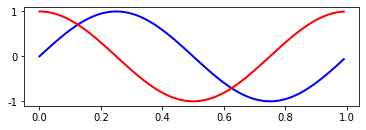

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3
# 然后用Axes实例的方法画了一条曲线
t = np.arange(0.0, 1.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.cos(2*np.pi*t)
ax.plot(t, s1, color='blue', lw=2)
ax.plot(t, s2, color='red', lw=2)

# 2.Artist对象
每个matplotlib Artist都有以下属性：

- alpha属性：透明度。值为0—1之间的浮点数   
- axes属性：返回这个Artist所属的axes，可能为None   
- figure属性：该Artist所属的Figure，可能为None  
- label：一个text label  
- visible：布尔值，控制Artist是否绘制  

Artist有两种类型：`primitives` 和`containers`。   
`primitive`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如**曲线Line2D，文字text，矩形Rectangle，图像image**等。  
`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。 

## 2.1 基本要素-primitives
### 1.曲线-Line2D
在matplotlib中曲线的绘制，主要是通过类 matplotlib.lines.Line2D 来完成的。
它的基类:  matplotlib.artist.Artist  
其中常用的的参数有：

xdata:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
ydata:需要绘制的line中点的在y轴上的取值
linewidth:线条的宽度
linestyle:线型
color:线条的颜色
marker:点的标记，详细可参考markers API
markersize:标记的size

常用color字符: 
                     
| 颜色字符 | 说明 | 颜色字符 | 说明 | 颜色字符 | 说明 | 颜色字符 | 说明 |
| ----  | ----  | ----  | ----  | ----  | ----  | ----  | ----  |
| r/red | 红色 | g/green | 绿色 | b/blue | 蓝色 | y/yellow | 黄色 |
| v/cyan | 蓝绿色 | k/black | 黑色 | w/white | 白色 | m/magenta | 粉紫色 |

常用marker字符: 
            
| 颜色字符 | 说明 | 颜色字符 | 说明 | 颜色字符 | 说明 | 颜色字符 | 说明 |
| ----  | ----  | ----  | ----  | ----  | ----  | ----  | ----  |
| . | 点 | , | 像素点 | o | 小圆 | * | 星号 |
| v | 三角向上| ^ | 三角向上 | > | 三角向右 | < | 三角向左 |
| s | 方块 | p | 五边形 | P | 大加 | + | 小加 |

<br>

### a.设置Line2D的属性   
有三种方法可以用设置线的属性。

***1) 直接在plot()函数中设置***:   
plt.plot(x,y, linewidth=10, marker = '*', color = 'red',markersize = 10)   

***2) 通过获得线对象，对线对象进行设置***     
line, = plt.plot(x, y, '-')  
line.set_antialiased(False) # 关闭抗锯齿功能  
line.set_marker("o")   
line.set_color("red")   
line.set_linewidth(10)   

**3) 获得线属性，使用setp()函数设置**     
lines = plt.plot(x, y)  
plt.setp(lines, color='r', linewidth=10)  
    
### b. 绘制lines     
***1) 绘制直线lines 常用的方法有两种***：    
pyplot方法绘制   
> plt.plot(x,y)   


Line2D对象绘制 
>ax = fig.add_subplot(111)  
line = Line2D(x, y)
ax.add_line(line)   
ax.set_xlim(min(x), max(x))         
ax.set_ylim(min(y), max(y))         

***2) errorbar绘制误差折线图***    
pyplot里有个专门绘制误差线的功能，通过`errorbar`类实现，它的构造函数： 
  
>matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, \*, data=None, \**kwargs)   
  
其中最主要的参数是前几个:  
+ **x**：需要绘制的line中点的在x轴上的取值  
+ **y**：需要绘制的line中点的在y轴上的取值  
+ **yerr**：指定y轴水平的误差  
+ **xerr**：指定x轴水平的误差   
+ **fmt**：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’  
+ **ecolor**：指定error bar的颜色  
+ **elinewidth**：指定error bar的线条宽度  

<ErrorbarContainer object of 3 artists>

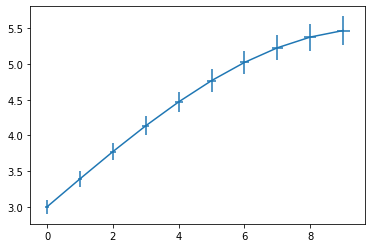

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
xerr = np.linspace(0.05, 0.2, 10)
yerr = np.linspace(0.1, 0.2, 10) #生成数字大小在0.5-0.2之间的10个数字
plt.errorbar(x, y + 3,xerr = xerr, yerr=yerr, label='both limits (default)')

### 2.patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：

>Patch(edgecolor=None, facecolor=None, color=None, linewidth=None, linestyle=None, antialiased=None, hatch=None, fill=True, capstyle=None, joinstyle=None, **kwargs)

### a. Rectangle-矩形
常用的矩形有hist直方图和bar条形图   
***1) hist-直方图***  
直方图，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。   

>matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)
    
下面是一些常用的参数：  
+ **x**: 数据集，最终的直方图将对数据集进行统计
+ **bins**: 统计的区间分布
+ **range**: tuple, 显示的区间，range在没有给出bins时生效
+ **density**: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
+ **histtype**: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
+ **align**: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
+ **log**: bool，默认False,即y坐标轴是否选择指数刻度
+ **stacked**: bool，默认为False，是否为堆积状图


***2) bar-柱状图***  
  
>matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)
  
下面是一些常用的参数：    
+ **left**：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串  
+ **height**：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；  
+ **alpha**：透明度，值越小越透明  
+ **width**：为柱形图的宽度，一般这是为0.8即可；  
+ **color或facecolor**：柱形图填充的颜色；  
+ **edgecolor**：图形边缘颜色   
+ **label**：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签

### b. Polygon-多边形

matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：
  
>class matplotlib.patches.Polygon(xy, closed=True, **kwargs)  
  
xy是一个N×2的numpy array，为多边形的顶点。  
closed为True则指定多边形将起点和终点重合从而显式关闭多边形。  

matplotlib.patches.Polygon类中常用的是fill类，它是基于xy绘制一个填充的多边形，它的定义：

>matplotlib.pyplot.fill(*args, data=None, **kwargs)

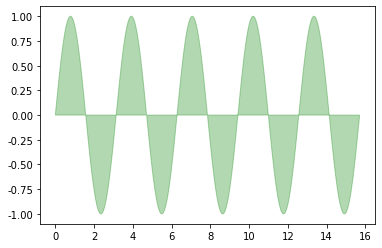

In [3]:
import matplotlib.pyplot as plt
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y2, color = "g", alpha = 0.3)

### 3.Wedge-契形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：

>class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)  
  
一个Wedge-契形 是以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。  
如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。

matplotlib.pyplot.pie语法：  
>matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)
  
制作数据x的饼图，每个楔子的面积用x/sum(x)表示。    
其中最主要的参数是前4个：  
+ **x**：契型的形状，一维数组。
+ **explode**：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。  
+ **labels**：用于指定每个契型块的标记，取值是列表或为None。  
+ **colors**：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。  
+ **startangle**：饼状图开始的绘制的角度。  

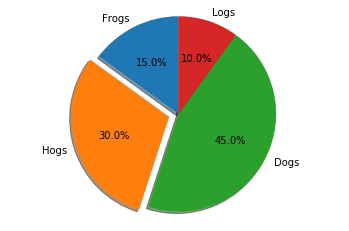

In [4]:
import matplotlib.pyplot as plt 
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

### 3. collections
collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类，scatter方法提供了该类的封装，根据x与y绘制不同大小或颜色标记的散点图。 它的构造方法：
  
>Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
      
      
其中最主要的参数是前5个：  
+ **x**：数据点x轴的位置  
+ **y**：数据点y轴的位置  
+ **s**：尺寸大小  
+ **c**：可以是单个颜色格式的字符串，也可以是一系列颜色  
+ **marker**: 标记的类型 

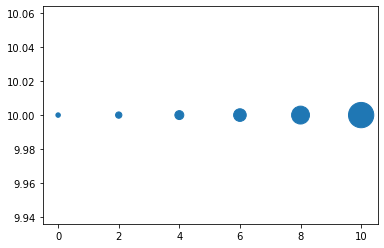

In [5]:
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s) 
plt.show()

### 4. images
images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：
>class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)
  
imshow根据数组绘制图像
>matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs）

使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

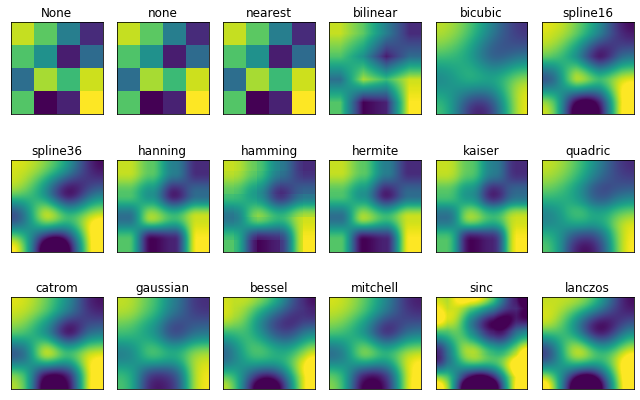

In [6]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

## 2.2 对象容器 - Object container

### 1.Figure 容器
`matplotlib.figure.Figure`是`Artist`最顶层的`container`-对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形`Rectangle`。  
当我们向图表添加`Figure.add_subplot()`或者`Figure.add_axes()`元素时，这些都会被添加到`Figure.axes`列表中。

**Figure容器的常见属性：**  
`Figure.patch`属性：Figure的背景矩形  
`Figure.axes`属性：一个Axes实例的列表（包括Subplot)  
`Figure.images`属性：一个FigureImages patch列表  
`Figure.lines`属性：一个Line2D实例的列表（很少使用）  
`Figure.legends`属性：一个Figure Legend实例列表（不同于Axes.legends)  
`Figure.texts`属性：一个Figure Text实例列表  

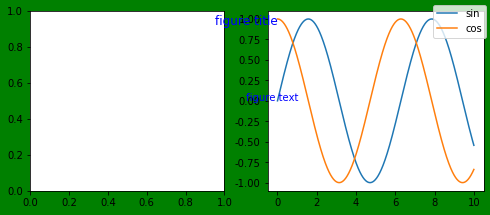

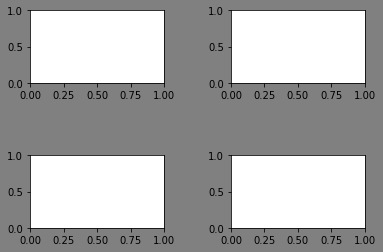

In [7]:
##### Figure方法常用设置
fig = plt.figure(figsize=(5,2), facecolor='grey')  # 创建figure

### 1. set方法通用设置，如set_facecolor()用来设置前景色，set_size_inches()用来设置大小等。
#添加区域axes:fig.add_axes([left, bottom, width, height])
axes1 = fig.add_axes([0,0,0.45,1]) #[0,0,0.45,1]
axes2 = fig.add_axes([0.55,0,0.5,1]) #[0.55,0,0.5,1]
# 设置前景色
fig.set_facecolor('g') 
# 设置大小
fig.set_size_inches(6,2.5)  # 设置大小

### 2.设置Figure标题
fig.suptitle("figure title", color='b')  # 设置figure标题

### 3.设置文本
fig.text(0.5,0.5,"figure text",color='b') 

### 4.设置图例
x = np.linspace(0, 10, 1000)
line1, = axes2.plot(x, np.sin(x))  # 注意，line1后面有个逗号，因为plot()方法返回值是一个列表
line2, = axes2.plot(x, np.cos(x))
fig.legend([line1, line2],['sin', 'cos'])

# 5. 设置画图区域与figure上下左右边框的比例距离
fig, axes = plt.subplots(2,2,facecolor='grey')
fig.subplots_adjust(left=None,   
                    bottom=None, 
                    right=None, 
                    top=None,
                    wspace=0.5,   # 子图间水平方向距离
                    hspace=1)     # 子图间垂直方向距离

### 2. Axes容器
`matplotlib.axes.Axes`是matplotlib的核心。大量的用于绘图的`Artist`存放在它内部，并且它有许多辅助方法来创建和添加`Artist`给它自己，而且它也有许多赋值方法来访问和修改这些`Artist`。  
  
和`Figure`容器类似，`Axes`包含了一个patch属性，对于笛卡尔坐标系而言，它是一个`Rectangle`；对于极坐标而言，它是一个`Circle`。这个patch属性决定了绘图区域的形状、背景和边框。

**Axes容器**的常见属性有：  
`artists`:    Artist实例列表   
`patch`:     Axes所在的矩形实例       
`collections`: Collection实例     
`images`:    Axes图像        
`legends`:	  Legend 实例    
`lines`:	  Line2D 实例     
`patches`:	  Patch 实例      
`texts`:	  Text 实例       
`xaxis`:	  matplotlib.axis.XAxis 实例       
`yaxis`:	  matplotlib.axis.YAxis 实例  


Text(0, -0.5, '(0,0)')

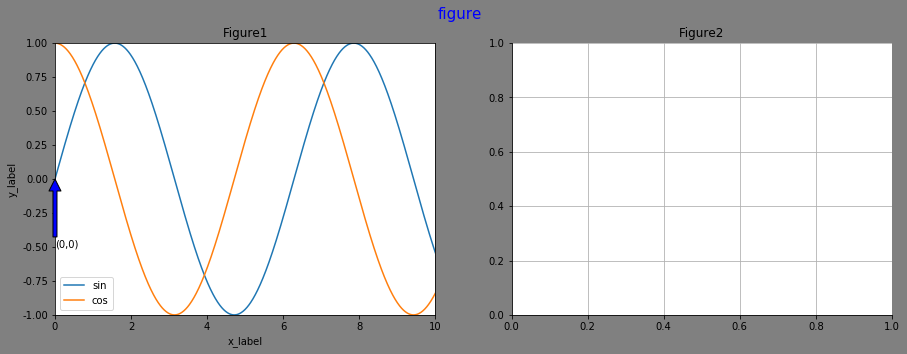

In [8]:
#### Axes常用设置
fig = plt.figure(figsize=(15,5), facecolor='grey')  # 创建figure

fig.suptitle("figure",size = 15, color='b')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

### 1.设置标题
ax1.set_title("Figure1")
ax2.set_title("Figure2")

### 2.设置图例
line1, = ax1.plot(x, np.sin(x))
line2, = ax1.plot(x, np.cos(x))
ax1.legend([line1,line2],["sin","cos"])

### 3.设置坐标轴名称
ax1.set_xlabel("x_label")
ax1.set_ylabel("y_label")

### 4.设置坐标轴范围
ax1.set_xlim((0,10))
ax1.set_ylim((-1,1))

### 5.隐藏边框
ax2.spines['right'].set_color('none') #隐藏掉右边框线
ax2.spines['top'].set_color('none')

### 6.显示网格
ax2.grid(True)

### 7.添加
ax1.annotate('(0,0)', xy=(0, 0),  # xy是指向点的坐标
             xytext=(0, -0.5),   # xytext注释文字的坐标
             arrowprops=dict(facecolor='b'))

### 3.Axis容器
`matplotlib.axis.Axis`实例处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制，它包括坐标轴上的刻度线、刻度`label`、坐标网格、坐标轴标题。通常你可以独立的配置y轴的左边刻度以及右边的刻度，也可以独立地配置x轴的上边刻度以及下边的刻度。

刻度包括主刻度和次刻度，它们都是Tick刻度对象。  
  
`Axis`也存储了用于自适应，平移以及缩放的`data_interval`和`view_interval`。它还有Locator实例和Formatter实例用于控制刻度线的位置以及刻度label。

每个Axis都有一个`label`属性，也有主刻度列表和次刻度列表。这些`ticks`是`axis.XTick`和`axis.YTick`实例，它们包含着`line primitive`以及`text primitive`用来渲染刻度线以及刻度文本。

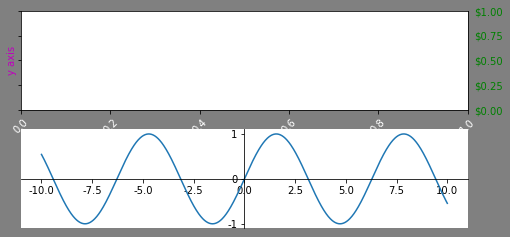

In [9]:
#### Axis常用设置
fig = plt.figure(figsize=(8,4), facecolor='grey')
ax = fig.add_subplot(2, 1, 1)

### 1.设置坐标轴名称
# x轴
ax.get_xaxis().get_label().set_text('x axis')
ax.get_xaxis().get_label().set_color('w')
ax.get_xaxis().get_label().set_fontsize(10)
# y轴
ax.yaxis.get_label().set_text('y axis')
ax.yaxis.get_label().set_color('m')
ax.yaxis.get_label().set_fontsize(10)

### 2.设置坐标轴刻度标签样式
for tick1 in ax.get_xaxis().get_ticklabels():
    tick1.set_color('w')
    tick1.set_rotation(45)
    tick1.set_fontsize(10)


### 3.设置坐标轴刻度位置
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick2 in ax.yaxis.get_major_ticks():
    tick2.label1.set_visible(False) #y坐标轴右侧不显示
    tick2.label2.set_visible(True) #y坐标轴左侧显示
    tick2.label2.set_color('green')

### 4.设置坐标轴位置
ax2 = fig.add_subplot(2,1,2)
x = np.linspace(-10, 10, 1000)
line1, = ax2.plot(x, np.sin(x))
ax2.spines['right'].set_color('none') #隐藏掉右边框线
ax2.spines['top'].set_color('none')    #隐藏掉左边框线
ax2.xaxis.set_ticks_position('bottom')  #设置坐标轴位置
ax2.yaxis.set_ticks_position('left')  #设置坐标轴位置
ax2.spines['bottom'].set_position(('data', 0))   #绑定坐标轴位置，data为根据数据自己判断
ax2.spines['left'].set_position(('data', 0))

### 4.Tick容器
`matplotlib.axis.Tick`是从`Figure`到`Axes`到`Axis`到`Tick`中最末端的容器对象。  
`Tick`包含了`tick`、`grid line`实例以及对应的`label`。 
  
所有的这些都可以通过`Tick`的属性获取，常见的`tick`属性有     
`Tick.tick1line`：Line2D实例  
`Tick.tick2line`：Line2D实例  
`Tick.gridline`：Line2D实例  
`Tick.label1`：Text实例  
`Tick.label2`：Text实例  
  
y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。   
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。 

### 思考题：   

1.primitives 和 container的区别和联系是什么？  
primitives和container是 `Artist` 的两种对象，其中：
primitives是基本要素，代表了在绘图区域上绘制的基础的绘图组件，比如Line2D，Rectangle，Text 以及AxesImage等等。
container是容器，代表了放置primitive的那些绘图组件。比如Axis、Axes以及Figure，

2.四个容器的联系和区别是么？他们分别控制一张图表的哪些要素？    
1.Figure容器是Artist最顶层的container-对象容器，它包含了图表中的所有元素。可以看做是一张画布。
2.Axes容器可以认为是figure这张画图上的子图，因为子图上一般都是坐标图，可以认为是轴域或者坐标系。可以设置标题，图例，坐标轴，边框，网格，注释等；
3.Axis容器是一种类似于坐标轴的概念，负责处理轴标签、刻度线、刻度标签、网格线的绘制。在大多数情况下，axis我们手动创建，在创建axes时会一并创建axis，通过axes的实例对象即可调用axes内的axis实例。通过axis实例，我们可以实现更加多样化、细微的图标操作；
4.Tick容器是最末端的容器对象。包含了`tick`、`grid line`实例以及对应的`label`。

figure是最底层的容器，相当于一张画布，在画布上，我们可以画多个axes，axes就是figure上的子图，每个axes都是一张独立的图表，每个axes包含多个axis，通过axis我们可以实现对图表更多细节上的操作。

### 问题
1. 教程中展示的案例都是单一图，请自行创建数据，**画出包含6个子图的线图**，要求：    
子图排布是 2 * 3 （2行 3列）；  
线图可用教程中line2D方法绘制；  
需要设置每个子图的横坐标和纵坐标刻度；
并设置整个图的标题，横坐标名称，以及纵坐标名称

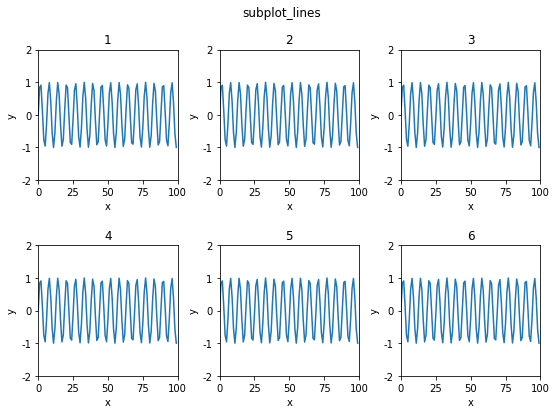

In [10]:
x = np.arange(100)
titles = ['1','2','3','4','5','6']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
# 设置标题
fig.suptitle("subplot_lines")
# 设置画图区域与figure上下左右边框的比例距离
fig.subplots_adjust(left=None,   
                    bottom=None, 
                    right=None, 
                    top=None,
                    wspace=0.3,   # 子图间水平方向距离
                    hspace=0.5)   

for ax, title in zip(axs.flat, titles):
    ax.plot(x,np.sin(x))
    ax.set_title(title)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_xlim((0,100))  
    ax.set_ylim((-2,2)) 

2. 分别用一组长方形柱和填充面积的方式模仿画出下图，函数 y = -1 * (x - 2) * (x - 8) +10 在区间[2,9]的积分面积

/home/huiyungao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


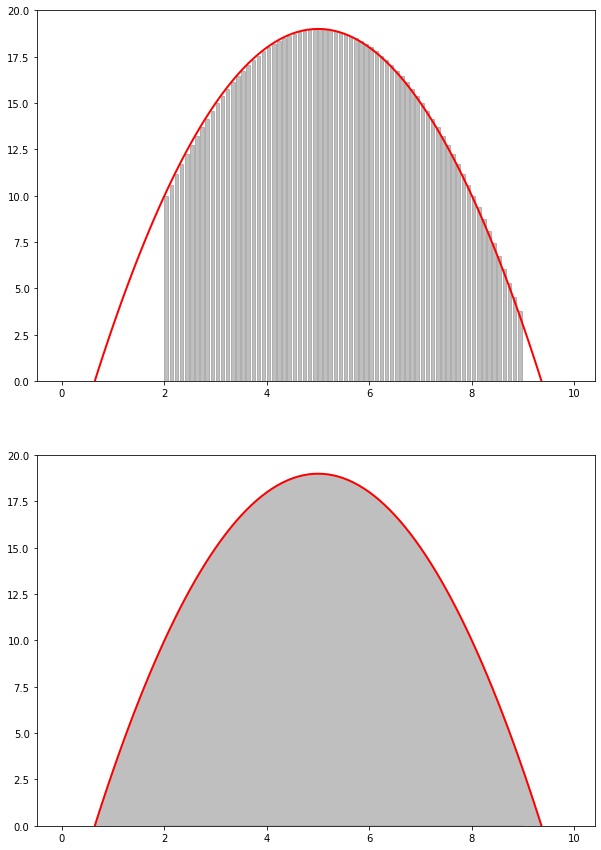

In [11]:

fig = plt.figure(figsize=(10, 15))

x1 = np.arange(0,10,0.1)
y1 = -1 * (x1 - 2) * (x1 - 8) +10

x2 = np.arange(0,10,0.1)
y2 = -1 * (x2 - 2) * (x2- 8) +10
xy = zip(x2, y2)

#长方柱
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x1, y1,color='red', lw=2)
ax1.set_ylim((0,20)) 
for i in range(20,90):
    rect = plt.Rectangle((x1[i],0), width=(x1[i+1]-x1[i]-0.03), height=y1[i], color='grey', alpha=0.5)
    ax1.add_patch(rect)


#灰色填充
from matplotlib.patches import Polygon
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x1, y1,color='red',  lw=2)
ax2.set_ylim((0,20)) 

# 确定多边形
verts = [(2, 0)] + list(xy) + [(9, 0)]
poly = Polygon(verts, facecolor='0.5', edgecolor='0.5', color='grey', alpha=0.5)
ax2.add_patch(poly)